In [1]:
from pathlib import Path
from scipy.io import wavfile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from nems0.analysis.gammatone.gtgram import gtgram
import nems0.epoch as ep
from nems import db, xform_helper
import nems0.plots.api as nplt

[nems0.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2022-06-08 142337.log


# compare bin/no-bin models

In [2]:
batch=338
modelnames = [
    "gtgram.fs100.ch18-ld-norm.l1-sev_wc.Nx3-fir.3x25-lvl.R-dexp.R_tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4",
    "gtgram.fs100.ch18.bin-ld-norm.l1-sev_wc.Nx3-fir.3x25-lvl.R-dexp.R_tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4",
    "gtgram.fs100.ch18-ld.pop-norm.l1-sev_wc.Nx40-fir.1x20x40-relu.40.f-wc.40x50-relu.50.f-wc.50xR-lvl.R-dexp.R_prefit-tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4",
    "gtgram.fs100.ch18.bin-ld.pop-norm.l1-sev_wc.Nx40-fir.1x20x40-relu.40.f-wc.40x50-relu.50.f-wc.50xR-lvl.R-dexp.R_prefit-tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4"
]

modelnames = [
#    "gtgram.fs100.ch18-ld.pop-norm.l1-sev_wc.Nx60-fir.1x20x60-wc.60xR-lvl.R-dexp.R_prefit-tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4",
#    "gtgram.fs100.ch18.bin-ld.pop-norm.l1-sev_wc.Nx60-fir.1x20x60-wc.60xR-lvl.R-dexp.R_prefit-tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4",
#    "gtgram.fs100.ch18-ld-norm.l1-sev_wc.Nx3-fir.3x25-lvl.R-dexp.R_tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4.l2:2",
#    "gtgram.fs100.ch18.bin-ld-norm.l1-sev_wc.Nx3-fir.3x25-lvl.R-dexp.R_tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4.l2:2",
    "gtgram.fs100.ch18-ld-norm.l1-sev_wc.Nx3-fir.3x25-lvl.R-dexp.R_tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4",
    "gtgram.fs100.ch18.bin-ld-norm.l1-sev_wc.Nx3-fir.3x25-lvl.R-dexp.R_tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4",
    "gtgram.fs100.ch18-ld.pop-norm.l1-sev_wc.Nx40-fir.1x25x40-relu.40.f-wc.40x60-relu.60.f-wc.60xR-lvl.R-dexp.R_prefit-tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4.l2:4",
    "gtgram.fs100.ch18.bin-ld.pop-norm.l1-sev_wc.Nx40-fir.1x25x40-relu.40.f-wc.40x60-relu.60.f-wc.60xR-lvl.R-dexp.R_prefit-tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4.l2:4"
]

ln_base = "wc.Nx3-fir.3x25-lvl.R-dexp.R"
cnn_base = "wc.Nx40-fir.1x25x40-relu.40.f-wc.40x50-relu.50.f-wc.50xR-lvl.R-dexp.R"
modelnames = [
    f"gtgram.fs100.ch18.mono-ld-norm.l1-sev_{ln_base}_tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4.l2:2",
    f"gtgram.fs100.ch18.bin-ld-norm.l1-sev_{ln_base}_tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4.l2:2",
    f"gtgram.fs100.ch18.mono-ld.pop-norm.l1-sev_{cnn_base}_prefit-tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4.l2:4",
    f"gtgram.fs100.ch18.bin-ld.pop-norm.l1-sev_{cnn_base}_prefit-tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4.l2:4",
]

In [3]:
dpred = db.batch_comp(batch=338, modelnames=modelnames, stat="r_ceiling")
dpred1 = db.batch_comp(batch=338, modelnames=modelnames, stat="r_test")
dpred2 = db.batch_comp(batch=338, modelnames=modelnames, stat="r_floor")
cols = ["LN-mono","LN-bin","CNN-mono","CNN-bin"]
cols1 = [ "r" + c for c in cols ]
cols2 = [ "se" + c for c in cols]
dpred.columns = cols
dpred1.columns = cols1
dpred2.columns = cols2
dpred=dpred.merge(dpred1,how='inner',left_index=True, right_index=True)
dpred=dpred.merge(dpred2,how='inner',left_index=True, right_index=True)
dpred.shape

(187, 12)

In [6]:
v=(dpred[cols1].values - dpred[cols2].values*2)>0
(v.sum(axis=1)>=len(cols)).sum()

88

In [226]:
v=(dpred[cols1].values - dpred[cols2].values*2)>0
dpred['sig']=(v.sum(axis=1)>=len(cols))
dpred.loc[dpred['sig'],cols].median()

LN-mono     0.556619
LN-bin      0.594783
CNN-mono    0.584572
CNN-bin     0.653688
dtype: float64

/home/svd/bin/miniconda3/envs/nems/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


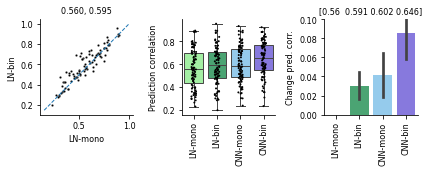

In [270]:
f,ax=plt.subplots(1,3,figsize=(6,2.5))

a,b="LN-mono","LN-bin"
#a,b="CNN-mono","CNN-bin"

ax[0].plot([.15,1],[.15,1],'--',lw=1)
sns.scatterplot(data=dpred.loc[dpred['sig']], x=a, y=b, color='k', s=5, ax=ax[0])
#ax[0].set_axis('equal')
ax[0].set_title(f"{dpred.loc[dpred['sig'],a].mean():.3f}, {dpred.loc[dpred['sig'],b].median():.3f}");


palette=['palegreen','mediumseagreen','lightskyblue','mediumslateblue']

df = dpred.loc[dpred['sig'],cols]
meanxc = df.mean()

sns.boxplot(data=df, palette=palette, linewidth=1, ax=ax[1])
sns.stripplot(data=df, color='k', s=2, ax=ax[1])
for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
ax[1].set_ylabel('Prediction correlation')

df = dpred.loc[dpred['sig'],cols]
df = df - df[[cols[0]]].values

sns.barplot(data=df, palette=palette, ax=ax[2], estimator=np.mean)
for tick in ax[2].get_xticklabels():
    tick.set_rotation(90)
ax[2].set_ylabel('Change pred. corr.')
ax[2].set_ylim([0,0.1])

ax[2].set_title(np.round(meanxc.values,3))
plt.tight_layout()

f.savefig(f'/auto/users/svd/docs/current/grant/r21_free_moving/eps/bin_strf_predsum.pdf')


In [262]:
[cols[0]]

['LN-mono']

In [265]:
df = dpred.loc[dpred['sig'],cols]
df = df - df[[cols[0]]].values

df.mean()

LN-mono     0.000000
LN-bin      0.030333
CNN-mono    0.041850
CNN-bin     0.085398
dtype: float64

In [120]:
modelnames = [
    "gtgram.fs100.ch18-ld-norm.l1-sev_wc.Nx3-fir.3x25-lvl.R-dexp.R_tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4.l2:2",
    "gtgram.fs100.ch18.bin-ld-norm.l1-sev_wc.Nx3-fir.3x25-lvl.R-dexp.R_tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4.l2:2",
    "gtgram.fs100.ch18-ld.pop-norm.l1-sev_wc.Nx40-fir.1x25x40-relu.40.f-wc.40x60-relu.60.f-wc.60xR-lvl.R-dexp.R_prefit-tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4.l2:4",
    "gtgram.fs100.ch18.bin-ld.pop-norm.l1-sev_wc.Nx40-fir.1x25x40-relu.40.f-wc.40x60-relu.60.f-wc.60xR-lvl.R-dexp.R_prefit-tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4.l2:4"
]
dpred = db.batch_comp(batch=338, modelnames=modelnames, stat="r_ceiling")
dpred1 = db.batch_comp(batch=338, modelnames=modelnames, stat="r_test")
dpred2 = db.batch_comp(batch=338, modelnames=modelnames, stat="r_floor")
dpred.columns=["LN","LN-bin","CNN","CNN-bin"]
dpred1.columns=["rLN","rLN-bin","rCNN","rCNN-bin"]
dpred2.columns=["seLN","seLN-bin","seCNN","seCNN-bin"]
dpred=dpred.merge(dpred1,how='inner',left_index=True, right_index=True)
dpred=dpred.merge(dpred2,how='inner',left_index=True, right_index=True)
dpred['diff']=dpred['LN-bin']-dpred['LN']

v=(dpred[["rLN","rLN-bin","rCNN","rCNN-bin"]].values - dpred[["seLN","seLN-bin","seCNN","seCNN-bin"]].values*2)>0
dpred['sig']=(v.sum(axis=1)==4)

dpred.loc[dpred['sig'],["LN","LN-bin","CNN","CNN-bin"]].median()
g = dpred.loc[dpred['sig'],["LN","LN-bin","CNN","CNN-bin",'diff']].sort_values(by='diff', ascending=False)
good_cells = g.index[:20]
bad_cells = g.index[-20:]

#g.head(20)
g = dpred.loc[dpred['sig'],["LN","LN-bin","CNN","CNN-bin",'diff']].sort_values(by='diff', ascending=False)
p = dpred.loc[dpred['sig'],["LN","LN-bin","CNN","CNN-bin",'diff']].sort_values(by='LN-bin', ascending=False)
high_pred_cells = p.index[:20]
p.head(20)


,LN,LN-bin,CNN,CNN-bin,diff
cellid,,,,,
CLT017a-022-1,0.953525,0.954931,0.945081,0.896522,0.001407
CLT017a-009-2,0.900180,0.894748,0.905348,0.909663,-0.005432
CLT013a-042-2,0.863369,0.892597,0.898905,0.910003,0.029228
CLT013a-024-2,0.866349,0.877791,0.843891,0.869866,0.011442
CLT017a-006-3,0.841191,0.873975,0.836516,0.851049,0.032784
CLT013a-003-1,0.843734,0.839585,0.764942,0.774715,-0.004149
CLT017a-036-3,0.803860,0.816997,0.810395,0.817147,0.013137
CLT023a-027-1,0.787907,0.809365,0.812100,0.807141,0.021458
CLT013a-006-2,0.705721,0.801682,0.738349,0.807469,0.095962


In [122]:
bad_cells


Index(['CLT011a-061-1', 'CLT020a-051-2', 'CLT017a-037-3', 'CLT023a-039-1',
       'CLT019a-046-1', 'CLT020a-011-1', 'CLT013a-058-2', 'CLT020a-042-4',
       'CLT013a-012-1', 'CLT019a-041-3', 'CLT013a-037-2', 'CLT011a-045-2',
       'CLT019a-013-2', 'CLT011a-027-1', 'CLT019a-043-6', 'CLT017a-037-4',
       'CLT013a-036-3', 'CLT013a-007-2', 'CLT020a-044-2', 'CLT020a-046-2'],
      dtype='object', name='cellid')

In [211]:
smodelnames = [modelnames[0], modelnames[2]]
cellid="CLT020a-046-2"
xf,ctx0=xform_helper.load_model_xform(cellid=cellid,batch=batch,modelname=smodelnames[0],eval_model=True)
xf,ctx1=xform_helper.load_model_xform(cellid=cellid,batch=batch,modelname=smodelnames[1],eval_model=True)

[nems0.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/338/CLT020a-046-2/gtgram.fs100.ch18.mono-ld-norm.l1-sev.wc.Nx3-fir.3x25-lvl.R-dexp.R.tfinit.n.lr1e...1015430085563609234 ...
[nems0.xforms INFO] Evaluating: nems0.xforms.init_context
[nems0.xforms INFO] Evaluating: nems0.xforms.init_context
[nems0.xforms INFO] xf argument cellid overlaps with existing context key: nems0.xforms.init_context
[nems0.xforms INFO] Evaluating: nems0.xforms.load_recordings
[nems0.utils INFO] Adjusting URI from http://hyrax.ohsu.edu:3003/recordings/338/CLT020a_94d1a85982f2e5e64dfbddb260ed9e9ffe614ba4.tgz to /auto/data/nems_db/recordings/338/CLT020a_94d1a85982f2e5e64dfbddb260ed9e9ffe614ba4.tgz
[nems0.xforms INFO] Extracting cellid(s) ['CLT020a-046-2']
[nems0.preprocessing INFO] Adding to epoch_onsets: TRIAL with shift = 0
[nems0.xforms INFO] Evaluating: nems0.xforms.normalize_sig
[nems0.xforms INFO] xforms.normalize_sig(minmax): stim b=0.0, g=2.02218216197169, dlog(..., -1)
[nems0.xf

## binaural spectrograms

In [212]:
ctx0['modelspec'].meta['r_ceiling'], ctx1['modelspec'].meta['r_ceiling']

(array([[0.3477877]]), array([[0.34379285]]))

Pretty segment for pub

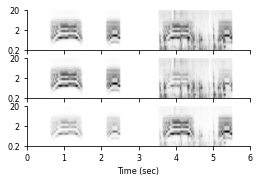

In [257]:
stim0=ctx0['val'].apply_mask()['stim']
stim1=ctx1['val'].apply_mask()['stim']
f,ax=plt.subplots(3,1,figsize=(4,2.5), sharex=True, sharey=True)
t1,t2=300,600
#t1,t2=0,450
ext = [0,6,0,1]
ax[0].imshow(stim0._data[:18,t1:t2]**2, cmap='gray_r', extent=ext, aspect='auto')
#ax[1].imshow(stim0._data[18:,t1:t2]**2, cmap='gray_r', extent=ext, aspect='auto')
ax[1].imshow(stim1._data[:18,t1:t2]**2, cmap='gray_r', extent=ext, aspect='auto')
ax[2].imshow(stim1._data[18:,t1:t2]**2, cmap='gray_r', extent=ext, aspect='auto')
ax[0].set_ylim(ax[0].get_ylim()[::-1])
ax[0].set_yticks([0,0.5,1.0],[20,2,0.2])
ax[2].set_xlabel('Time (sec)')
f.savefig(f'/auto/users/svd/docs/current/grant/r21_free_moving/eps/bin_spectrogram.pdf')


## example binaural STRFs

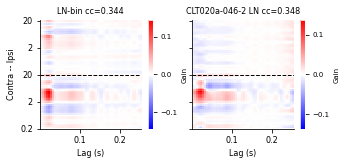

In [214]:
import importlib
importlib.reload(nplt)

f,ax=plt.subplots(1,2,figsize=(5,2), sharex=True, sharey=True)
nplt.strf_heatmap(ctx1['modelspec'],title=f"LN-bin cc={ctx1['modelspec'].meta['r_ceiling'][0,0]:.3f}", fs=100, ax=ax[0], interpolation=[2,2])
ax[0].axhline(y=36, linestyle='--',lw=1,color='k');
nplt.strf_heatmap(ctx0['modelspec'],title=f"{cellid} LN cc={ctx0['modelspec'].meta['r_ceiling'][0,0]:.3f}", fs=100, ax=ax[1], interpolation=[2,2])
ax[1].axhline(y=36, linestyle='--',lw=1,color='k')

ax[0].set_ylabel('Contra -- Ipsi')
ax[0].set_yticks([0,18,36,54,72],[0.2,2,20,2,20])
ax[1].set_ylabel('');


[nems0.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/338/CLT017a-022-1/gtgram.fs100.ch18-ld-norm.l1-sev.wc.Nx3-fir.3x25-lvl.R-dexp.R.tfinit.n.lr1e3.et3...-554482509522473616 ...
[nems0.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/338/CLT017a-022-1/gtgram.fs100.ch18.bin-ld-norm.l1-sev.wc.Nx3-fir.3x25-lvl.R-dexp.R.tfinit.n.lr1e3...170181205930381095 ...
[nems0.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/338/CLT017a-009-2/gtgram.fs100.ch18-ld-norm.l1-sev.wc.Nx3-fir.3x25-lvl.R-dexp.R.tfinit.n.lr1e3.et3...1798503301084246503 ...
[nems0.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/338/CLT017a-009-2/gtgram.fs100.ch18.bin-ld-norm.l1-sev.wc.Nx3-fir.3x25-lvl.R-dexp.R.tfinit.n.lr1e3...-8525824171332812315 ...
[nems0.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/338/CLT013a-042-2/gtgram.fs100.ch18-ld-norm.l1-sev.wc.Nx3-fir.3x25-lvl.R-dexp.R.tfinit.n.lr1e3.et3...-288

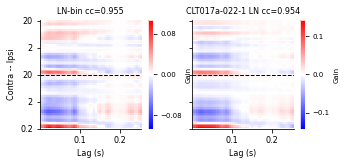

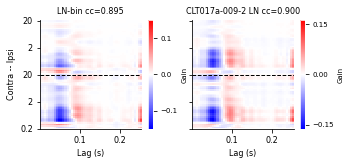

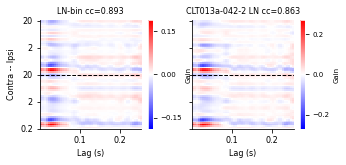

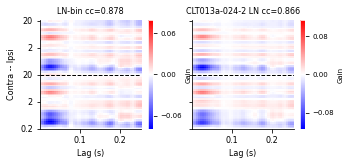

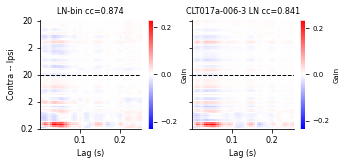

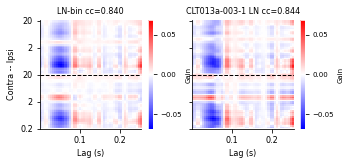

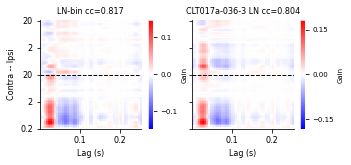

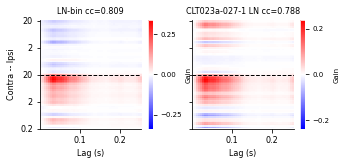

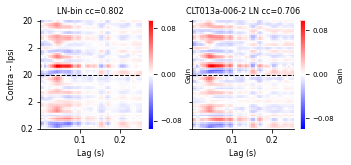

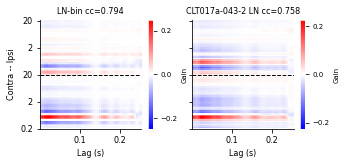

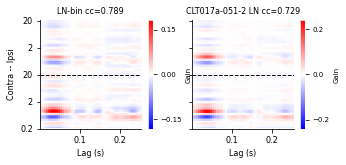

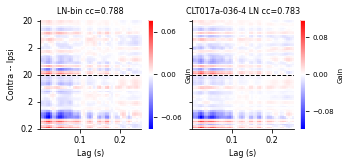

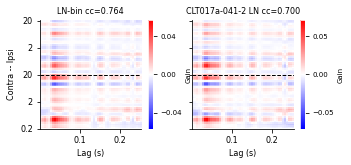

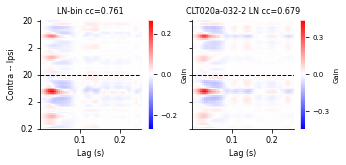

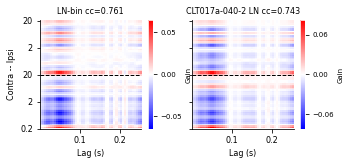

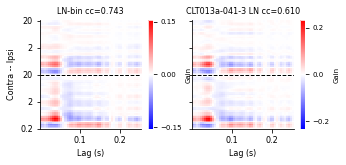

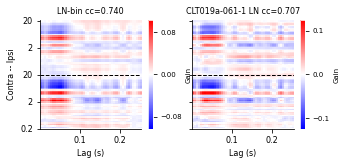

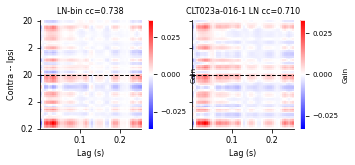

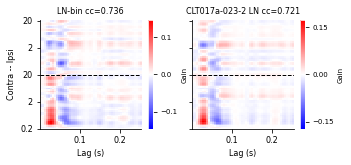

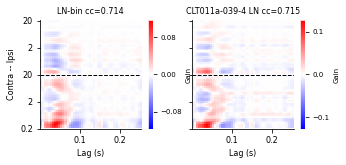

In [154]:
fig_list=[]
#for cellid in good_cells:
for cellid in high_pred_cells:
    xf,ctx0=xform_helper.load_model_xform(cellid=cellid,batch=batch,modelname=smodelnames[0],eval_model=False)
    xf,ctx1=xform_helper.load_model_xform(cellid=cellid,batch=batch,modelname=smodelnames[1],eval_model=False)

    f,ax=plt.subplots(1,2,figsize=(5,2), sharex=True, sharey=True)
    nplt.strf_heatmap(ctx1['modelspec'],title=f"LN-bin cc={ctx1['modelspec'].meta['r_ceiling'][0,0]:.3f}", fs=100, ax=ax[0], interpolation=[2,2])
    ax[0].axhline(y=36, linestyle='--',lw=1,color='k');
    nplt.strf_heatmap(ctx0['modelspec'],title=f"{cellid} LN cc={ctx0['modelspec'].meta['r_ceiling'][0,0]:.3f}", fs=100, ax=ax[1], interpolation=[2,2])
    ax[1].axhline(y=36, linestyle='--',lw=1,color='k')

    ax[0].set_ylabel('Contra -- Ipsi')
    ax[0].set_yticks([0,18,36,54,72],[0.2,2,20,2,20])
    ax[1].set_ylabel('');

    fig_list.append(f)
    
    f.savefig(f'/auto/users/svd/docs/current/grant/r21_free_moving/eps/bin_strf_example_{cellid}.pdf')


In [88]:
nplt.strf_heatmap?

Signature:
nplt.strf_heatmap(
    modelspec,
    ax=None,
    clim=None,
    show_factorized=True,
    title='STRF',
    fs=None,
    chans=None,
    wc_idx=0,
    fir_idx=0,
    interpolation=None,
    absolute_value=False,
    cmap='RdYlBu_r',
    manual_extent=None,
    show_cbar=True,
    **options,
)
Docstring:
chans: list
   if not None, label each row of the strf with the corresponding
   channel name
interpolation: string, tuple
   if string, passed on as parameter to imshow
   if tuple, ndimage "zoom" by a factor of (x,y) on each dimension
File:      /auto/users/svd/python/nems/nems/plots/heatmap.py
Type:      function


# queue pop models

In [8]:
from nems_lbhb.exacloud.queue_exacloud_job import enqueue_exacloud_models

batches = [322,323]
modelname_filter="ozgf.fs100.ch18.pop-loadpop.hm-norm.l1-popev_wc.18x80.g-fir.1x25x80-relu.80.f-wc.80x100-relu.100.f-wc.100xR-lvl.R-dexp.R_tfinit.n.lr1e3.et3.rb10.es20-newtf.n.lr1e4.es20"

force_rerun = False
lbhb_user="svd"

# exacloud settings:
executable_path = '/home/users/davids/anaconda3/envs/nems/bin/python'
script_path = '/home/users/davids/nems/scripts/fit_single.py'
ssh_key = '/home/svd/.ssh/id_rsa'
user = "davids"

#for siteid in siteids:
#    #print(f'Fitting {siteid} {batch} {modelname}')
for batch in batches:
    siteids, cellids = nd.get_batch_sites(batch, modelname_filter=modelname_filter)
    siteids = ['NAT4']
    enqueue_exacloud_models(
        cellist=siteids, batch=batch, modellist=modelnames,
        user=lbhb_user, linux_user=user, force_rerun=force_rerun, 
        executable_path=executable_path, script_path=script_path, useGPU=True)

[nems_lbhb.exacloud.queue_exacloud_job INFO] Added exacloud job: NAT4/322/ozgf.fs100.ch18.pop-ld-norm.l1-popev_conv2d.10.8x3.rep3-wcn.110-relu.110-wc.110xR-lvl.R-dexp.R_tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4
[nems_lbhb.exacloud.queue_exacloud_job INFO] Added exacloud job: NAT4/322/ozgf.fs100.ch18.pop-ld-norm.l1-popev_wc.18x80.g-fir.1x25x80-relu.80.f-wc.80x100-relu.100.f-wc.100xR-lvl.R-dexp.R_tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4
[nems_lbhb.exacloud.queue_exacloud_job INFO] Added exacloud job: NAT4/322/ozgf.fs100.ch18.pop-ld-norm.l1-popev_wc.18x70.g-fir.1x15x70-relu.70.f-wc.70x80-fir.1x10x80-relu.80.f-wc.80x100-relu.100-wc.100xR-lvl.R-dexp.R_tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4
[nems_lbhb.exacloud.queue_exacloud_job INFO] Added exacloud job: NAT4/322/ozgf.fs100.ch18.pop-ld-norm.l1-popev_wc.18x30.g-fir.1x25x30-wc.30xR-lvl.R-dexp.R_tfinit.n.lr1e3.et3.es20-newtf.n.lr1e4
[nems_lbhb.exacloud.queue_exacloud_job INFO] Added exacloud job: NAT4/322/ozgf.fs100.ch18.pop-ld-norm.l1-popev_wc.18x4.g-

In [2]:
parmfile = '/auto/data/daq/Clathrus/CLT017/CLT017a11_p_BNT.m'
ex=BAPHYExperiment(parmfile)
rasterfs=100
rec = ex.get_recording(resp=True, stim=False, pupil=False, rasterfs=rasterfs)

[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Clathrus/CLT017a/CLT017a_5d83a796c38bac4ba9721653cc51b5773b33e182.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found


In [3]:
exptevents=ex.get_baphy_exptevents()[0]
exptevents.shape

[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Clathrus/CLT017/CLT017a11_p_BNT.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Clathrus/CLT017/CLT017a11_p_BNT.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Clathrus/CLT017/CLT017a11_p_BNT.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Clathrus/CLT017/CLT017a11_p_BNT.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data


(12267, 4)

In [5]:
#baphy_root = "/auto/users/svd/code/baphy/"
exptparams=ex.get_baphy_exptparams()[0]
sound_root = Path(exptparams['TrialObject'][1]['ReferenceHandle'][1]['SoundPath'].replace("H:/", "/auto/data/"))
sound_root

PosixPath('/auto/data/sounds/BigNat/v1')

In [6]:
exptparams['TrialObject'][1]['ReferenceHandle'][1]['Names'][:10]

['cat10099_rec1_481_c0308_excerpt1:1+cat153_rec1_fireworks_excerpt1:2',
 'cat10099_rec1_481_c0308_excerpt1:1+NULL:2',
 'NULL:1+cat10099_rec1_481_c0308_excerpt1:2',
 'cat100_rec1_crowd-chanting_sound-ideas-13-86_excerpt1:1+cat153_rec1_fireworks_excerpt2:2',
 'cat100_rec1_crowd-chanting_sound-ideas-13-86_excerpt1:1+NULL:2',
 'NULL:1+cat100_rec1_crowd-chanting_sound-ideas-13-86_excerpt1:2',
 'cat102_rec1_crumpling_paper_excerpt1:1+cat156_rec1_wings_flapping_sound-ideas-3-25_excerpt1:2',
 'cat102_rec1_crumpling_paper_excerpt1:1+NULL:2',
 'NULL:1+cat102_rec1_crumpling_paper_excerpt1:2',
 'cat103_rec1_crying_excerpt1:1+cat157_rec1_switch_sound-ideas-21-46_excerpt1:2']

In [47]:
from nems_lbhb import runclass
import importlib
importlib.reload(runclass)
#stimfmt='gtgram', separate_files_only=False
sg = runclass.BNT_stim(exptevents,exptparams,stimfmt='gtgram', separate_files_only=False)
filename_unique = list(sg.keys())

cat10099_rec1_481_c0308_excerpt1 0 cat153_rec1_fireworks_excerpt1 1
Pre/Dur/Pos: 0.25/1/0.25
assuming fixed fs at 44100
cat131_rec1_drinking_freesound_georgisound_excerpt1:1+cat202_rec1_ice_in_glass_excerpt1:2 (44100, 2) [370.43117093 428.93524609]
cat173_rec1_giggling_excerpt1:1+NULL:2 (44100, 2) [397.65183699   0.        ]
NULL:1+cat225_rec1_tiger_growl_excerpt1:2 (44100, 2) [  0.         585.34541289]
cat291_rec1_rattlesnake_excerpt1:1+cat374_rec1_chugging_clacking_excerpt1:2 (44100, 2) [118.01179247 262.19630098]
cat345_rec1_male_sneezing_excerpt1:1+NULL:2 (44100, 2) [358.95584416   0.        ]
NULL:1+cat408_rec1_leaves_rustling_excerpt1:2 (44100, 2) [  0.         468.99413302]
cat512_rec1_heart_beat_excerpt1:1+cat568_rec1_monkey_panting_excerpt1:2 (44100, 2) [357.54671376 342.7958809 ]
cat552_rec1_printing_press_excerpt1:1+NULL:2 (44100, 2) [315.20121422   0.        ]
NULL:1+cat582_rec1_heavy_machinery_forklift_excerpt1:2 (44100, 2) [  0.         313.30185353]
cat613_rec1_gasping_

In [51]:
len(filename_unique)
filename=filename_unique[108]
sg[filename][:,:,1].shape

(18, 150)

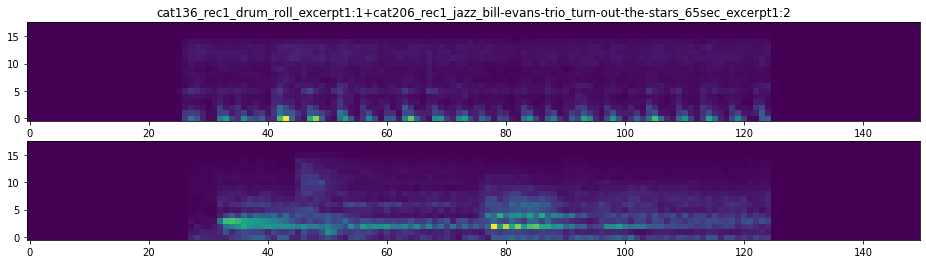

In [49]:
filename=filename_unique[108]

f,ax=plt.subplots(2,1,figsize=(16,4))
ax[0].imshow(sg[filename][:,:,0],origin='lower',aspect='auto',interpolation='none')
ax[0].set_title(filename);
ax[1].imshow(sg[filename][:,:,1],origin='lower',aspect='auto',interpolation='none')


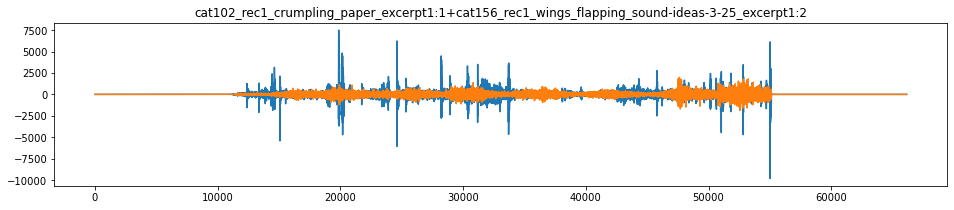

In [25]:
filename=filename_unique[6]

plt.figure(figsize=(16,3))
plt.plot(sg[filename])
plt.title(filename);

In [37]:
stim_epochs = exptevents.loc[exptevents.name.str.startswith("Stim"),'name'].tolist()
wav1=[e.split(' , ')[1].split("+")[0].split(":")[0].replace("STIM_","")+'.wav' for e in stim_epochs]
wav2=[e.split(' , ')[1].split("+")[0].split(":")[0].replace("STIM_","")+'.wav' for e in stim_epochs]

wav_unique=wav1.copy()
wav_unique.extend(wav2)
wav_unique=list(set(wav_unique))
wav_unique.remove('NULL.wav')
print('number of wav files: ', len(wav_unique))
wav_unique[0]

number of wav files:  405


'cat136_rec1_drum_roll_excerpt1.wav'

In [17]:
filename = wav_unique[1]
fs,w = wavfile.read(sound_root / filename)
fs, w.shape

(44100, (176400,))

In [18]:
window_time=1/rasterfs * 1
hop_time=1/rasterfs
channels=64
f_min=200
f_max=20000
sg = gtgram(w,fs,window_time, hop_time, channels,f_min, f_max)

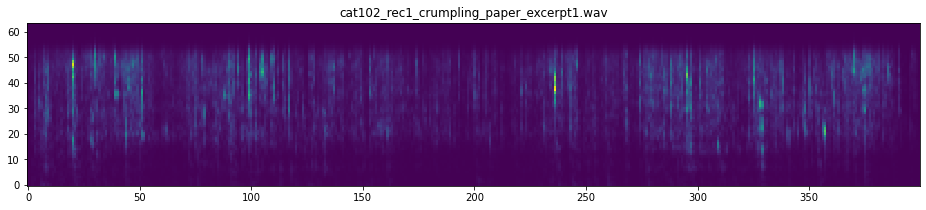

In [19]:
plt.figure(figsize=(16,3))
plt.imshow(sg,origin='lower',aspect='auto',interpolation='none')
plt.title(filename);